----------------

# Отчет по лабораторной работе: "Метод опорных векторов (SVM)"

---------

## Дата выполнения лабораторной работы

`04.01.2025`

---

## Название лабораторной работы 

`"Метод опорных векторов (SVM)"`

---

## Цель лабораторной работы

`Освоить метод опорных векторов (SVM) для задачи классификации`


----------------------

## Задачи лабораторной работы


1. Извлечение признаков (дескрипторов)


2. Нормализация признаков для улучшения работы модели.

3. Применение метода опорных векторов (SVM) для классификации.
* Подбор оптимальных гиперпараметров через GridSearchCV.
* Оценка качества модели

4. Расчёт метрик: сбалансированная точность (balanced accuracy).
* Построение ROC-кривой и вычисление AUC для оценки качества классификации.

----

## Материалы, использовавшиеся для выполнения лабораторной работы (программы, исходные файлы ?) 

1. [Официальная документация scikit-learn](https://scikit-learn.org/stable/modules/svm.html)

----

## Поэтапное изложение процедуры


Датасет был разделён на обучающую (75%) и тестовую (25%) выборки.

Была построена модель SVM-классификатора с разными параметрами. Оптимальные гиперпараметры C и gamma были подобраны с помощью GridSearchCV. Были исследованы различные ядра (kernel).

Метрики оценки: сбалансированная точность (balanced accuracy), F1-score, ROC-AUC.
Дополнительно измерено время обучения модели (mean_time_fit_s_cv) и её размер в памяти (size_model_pipeline_mb).

-----

## Результаты работы (+ таблицы, графики, иллюстрации?, если требуются)




Влияние сэмплирования данных на результаты классификации
1. Без сэмплирования (NonSampl)

MinMaxScaler: balanced_accuracy = 0.68, F1 = 0.70, AUC = 0.68

StandardScaler: balanced_accuracy = 0.69, F1 = 0.71, AUC = 0.75

* Базовый вариант. Модель страдает от дисбаланса классов, accuracy ниже по сравнению с методами балансировки.

2. Oversampling (SMOTE, SMOTE-Tomek)

SMOTE (MinMaxScaler): balanced_accuracy = 0.69, F1 = 0.71, AUC = 0.74

SMOTE (StandardScaler): balanced_accuracy = 0.71, F1 = 0.73, AUC = 0.75

SMOTE-Tomek (MinMaxScaler): balanced_accuracy = 0.72, F1 = 0.74, AUC = 0.76

SMOTE-Tomek (StandardScaler): balanced_accuracy = 0.71, F1 = 0.72, AUC = 0.75

* SMOTE и SMOTE-Tomek увеличили сбалансированную точность и AUC, особенно при MinMaxScaler. Лучший результат (0.72, 0.76) достигнут при SMOTE-Tomek.

3. Undersampling (UnderSampl)

UnderSampling (MinMaxScaler): balanced_accuracy = 0.71, F1 = 0.71, AUC = 0.75

UnderSampling (StandardScaler): balanced_accuracy = 0.69, F1 = 0.70, AUC = 0.75

* Undersampling помог улучшить сбалансированную точность (до 0.71), но F1-score остался на уровне несбалансированной модели.


**Лучший вариант: SMOTE-Tomek + MinMaxScaler (balanced_accuracy = 0.72, F1 = 0.74, AUC = 0.76)**

In [4]:
import pandas as pd

pd.read_csv("svmclsf.csv")

,model,size_x_test,balance_activity_train,balance_activity_test,balanced_accuracy,f1,auc,mean_time_fit_s_cv,mean_ram_fit_mb,size_model_pipeline_mb,grade,params
0,SVMClsfNonSamplMinMaxSc,25%,"{1: 345, 3: 185}","{1: 110, 3: 67}",0.68,0.70,0.68,0.35,0.0,0.05,False,"{'C': np.float64(12.6), 'gamma': 'scale', 'ker..."
1,SVMClsfSMOTEMinMaxSc,25%,"{1: 345, 3: 185}","{1: 110, 3: 67}",0.69,0.71,0.74,0.11,0.0,0.06,False,"{'C': np.float64(6.2), 'gamma': 'scale', 'kern..."
2,SVMClsfUnderSamplMinMaxSc,25%,"{1: 345, 3: 185}","{1: 110, 3: 67}",0.71,0.71,0.75,0.17,0.0,0.03,False,"{'C': np.float64(12.200000000000001), 'gamma':..."
3,SVMClsfSMOTETomekMinMaxSc,25%,"{1: 345, 3: 185}","{1: 110, 3: 67}",0.72,0.74,0.76,0.09,0.0,0.05,False,"{'C': np.float64(13.3), 'gamma': 'scale', 'ker..."
4,SVMClsfNonSamplStdSc,25%,"{1: 345, 3: 185}","{1: 110, 3: 67}",0.69,0.71,0.75,0.07,0.0,0.05,False,"{'C': np.float64(3.5000000000000004), 'gamma':..."
5,SVMClsfSMOTEStdSc,25%,"{1: 345, 3: 185}","{1: 110, 3: 67}",0.71,0.73,0.75,0.11,0.0,0.06,False,"{'C': np.float64(3.7), 'gamma': 'scale', 'kern..."
6,SVMClsfUnderSamplStdSc,25%,"{1: 345, 3: 185}","{1: 110, 3: 67}",0.69,0.70,0.75,0.05,0.0,0.04,False,"{'C': np.float64(6.6), 'gamma': 'scale', 'kern..."
7,SVMClsfSMOTETomekStdSc,25%,"{1: 345, 3: 185}","{1: 110, 3: 67}",0.71,0.72,0.75,0.10,0.0,0.06,False,"{'C': np.float64(4.8), 'gamma': 'scale', 'kern..."


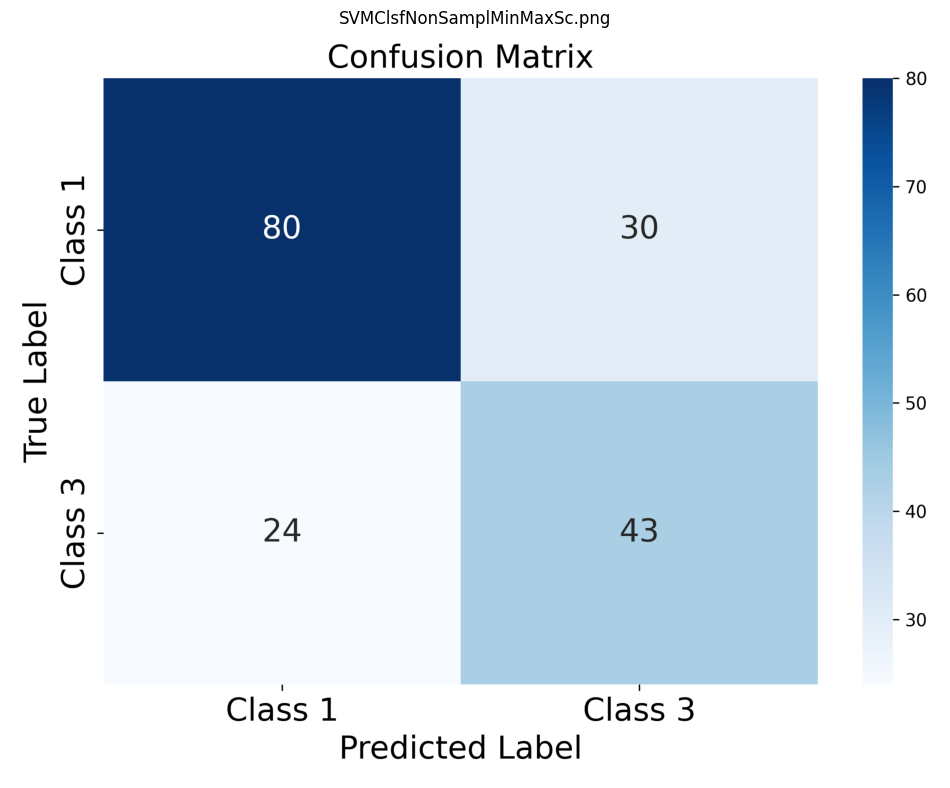

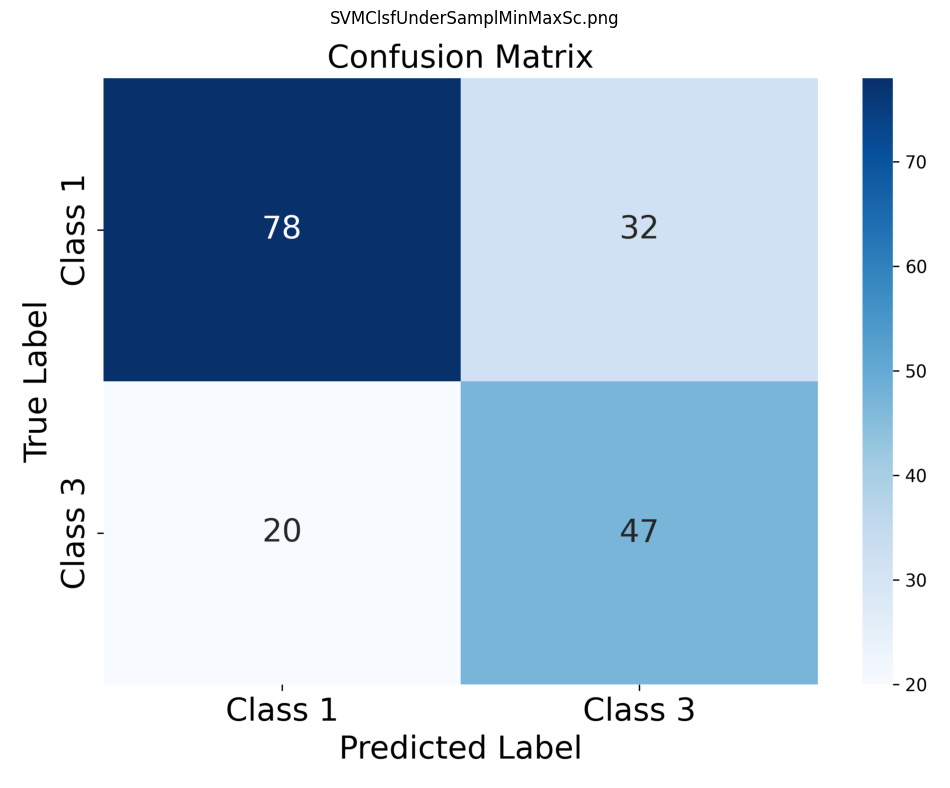

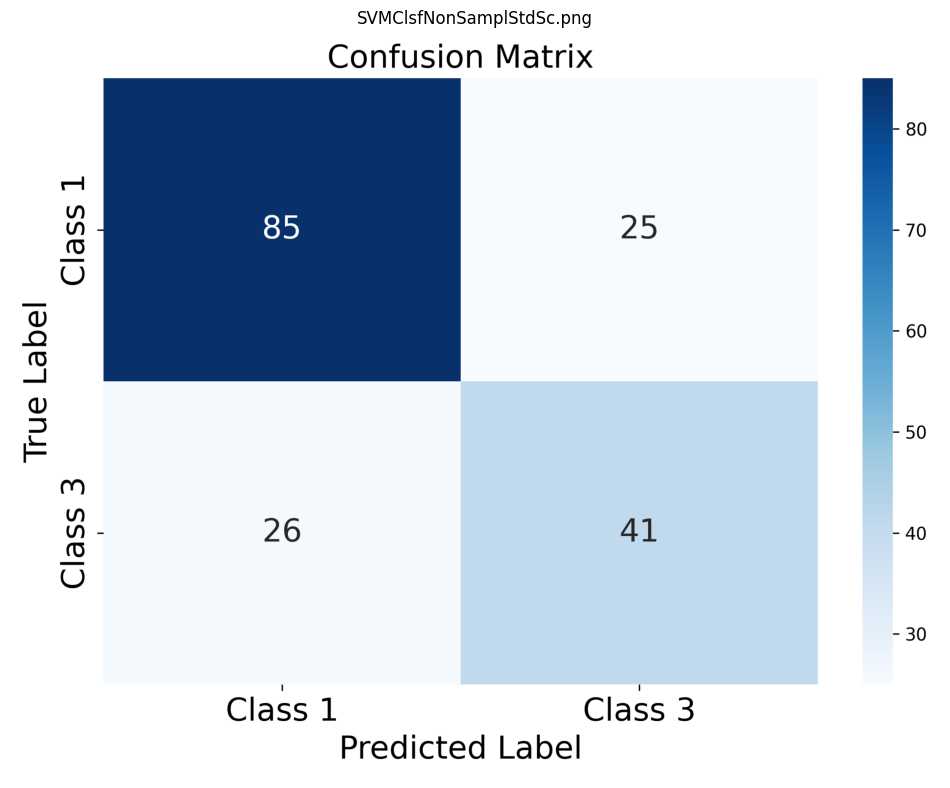

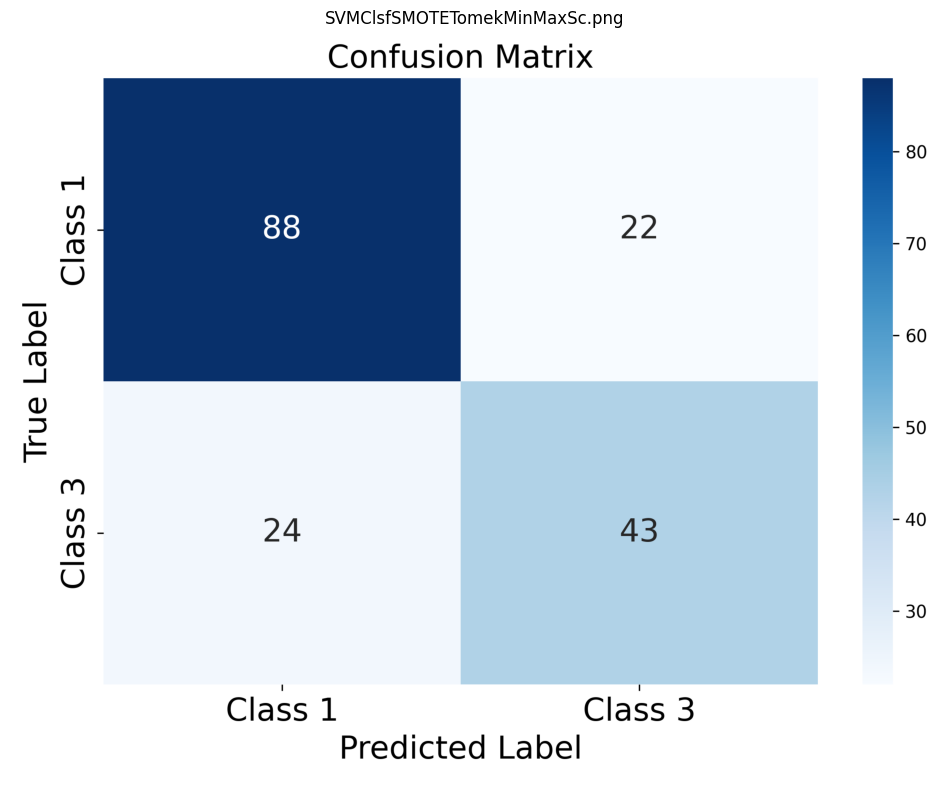

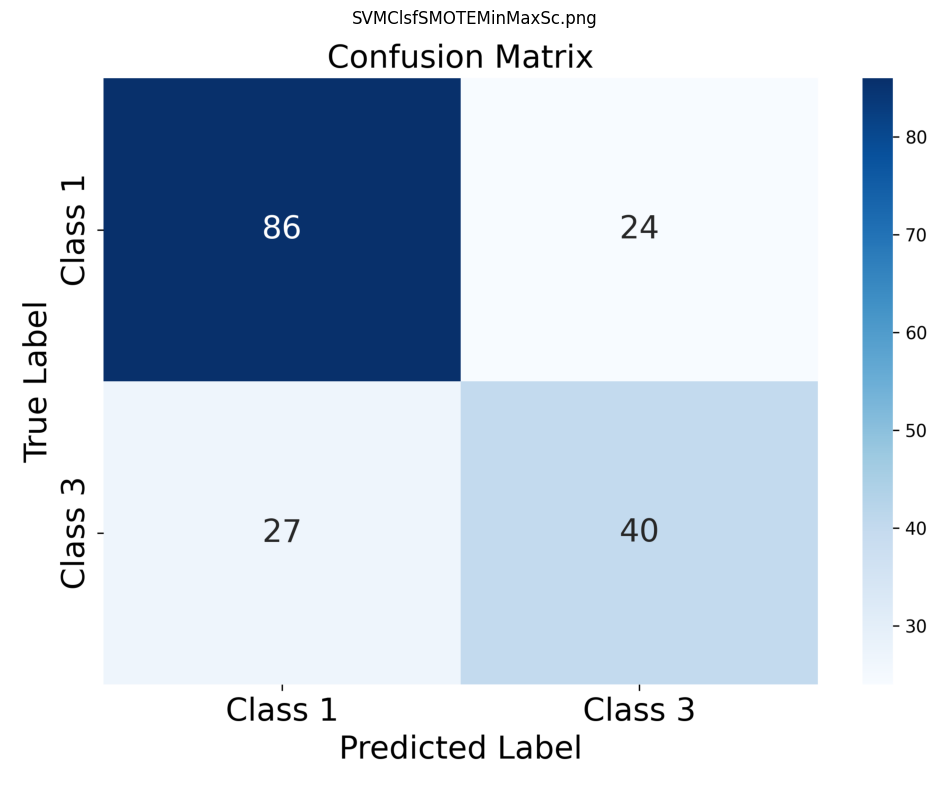

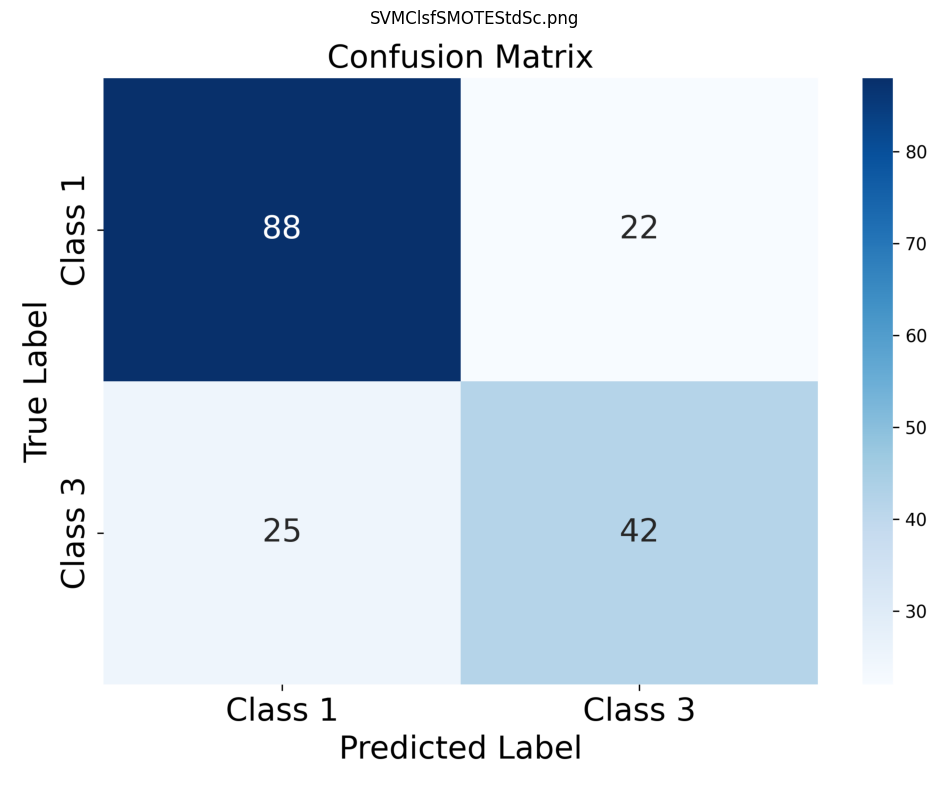

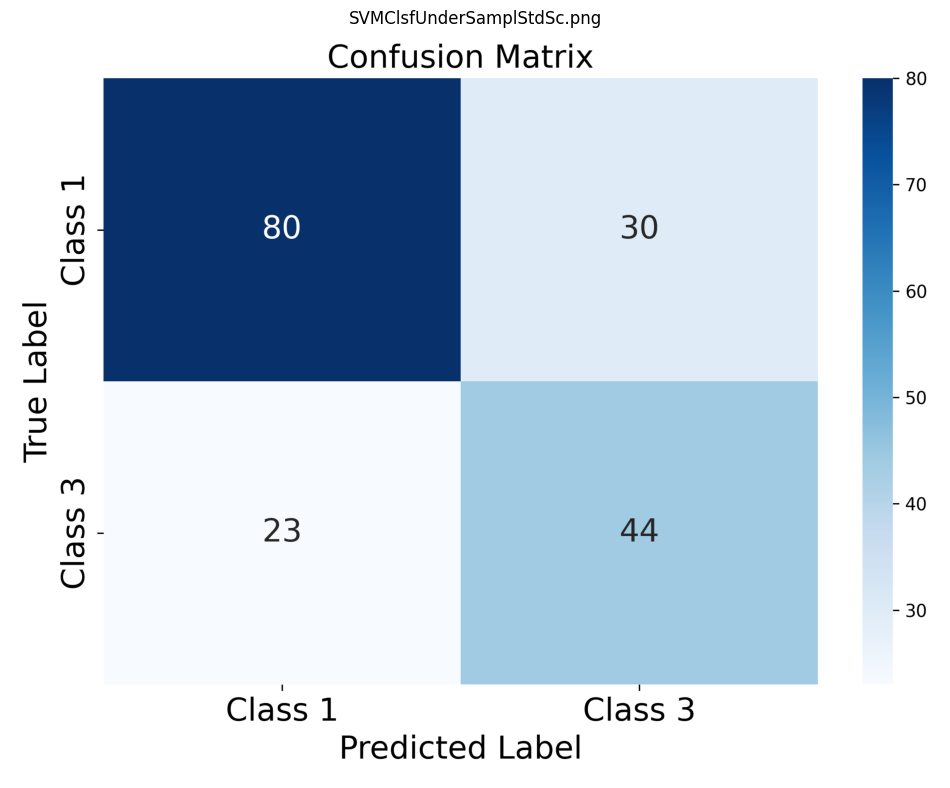

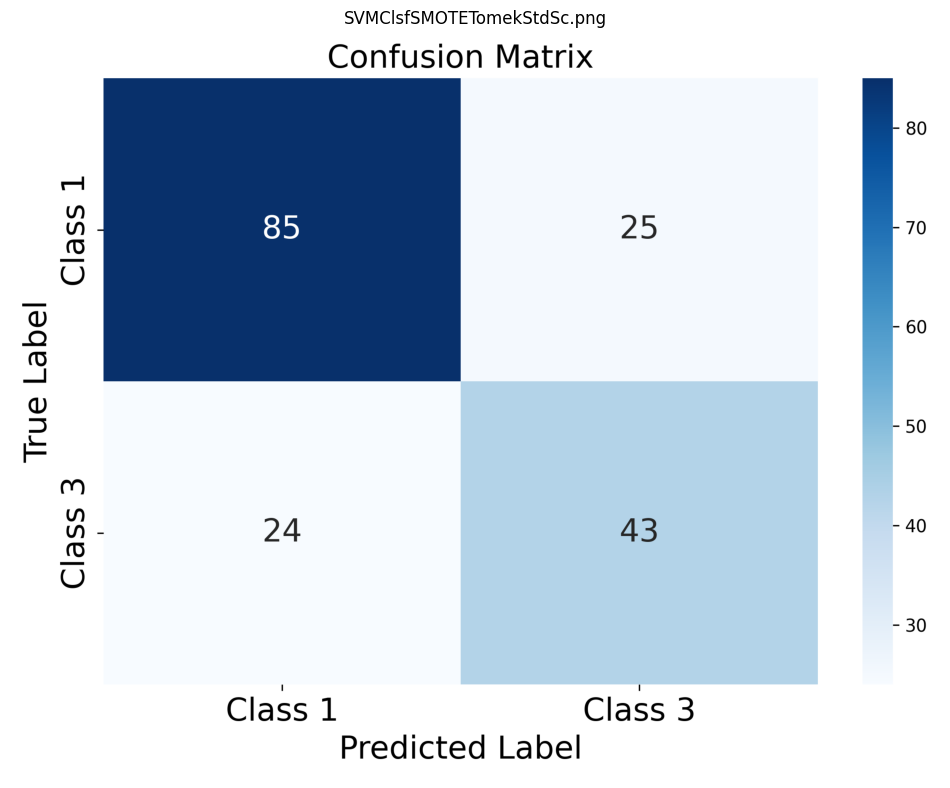

In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image

folder_path = "./matrix"

image_files = [f for f in os.listdir(folder_path) if f.endswith(".png")]

for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    img = Image.open(image_path)
    
    plt.figure(figsize=(12, 10))
    plt.imshow(img)
    plt.axis("off")
    plt.title(image_file)
    plt.show()

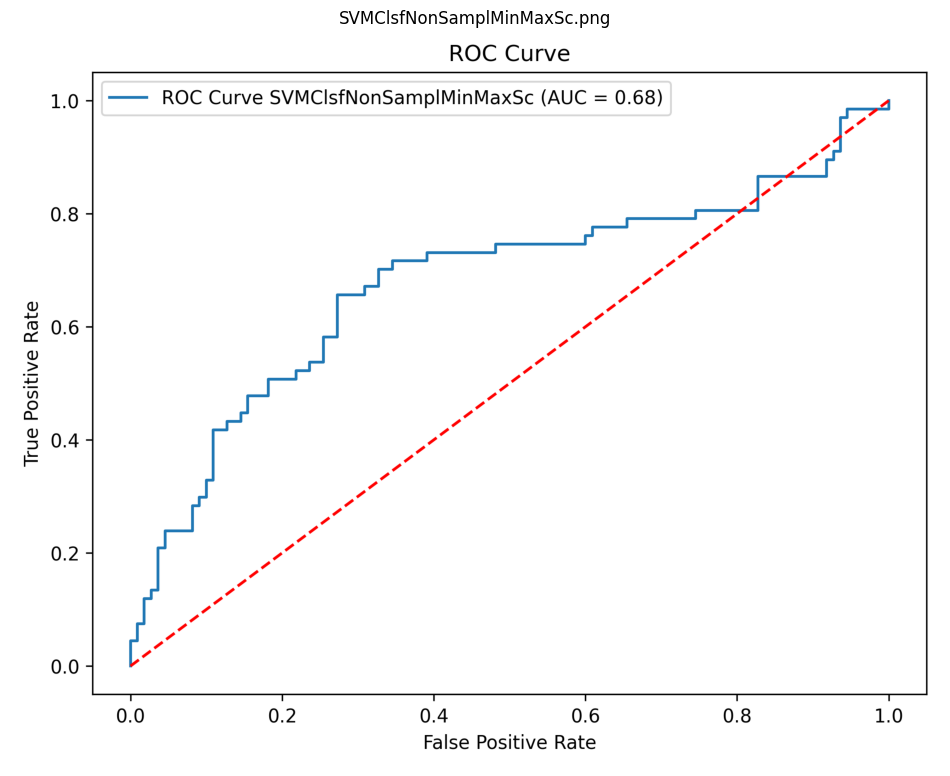

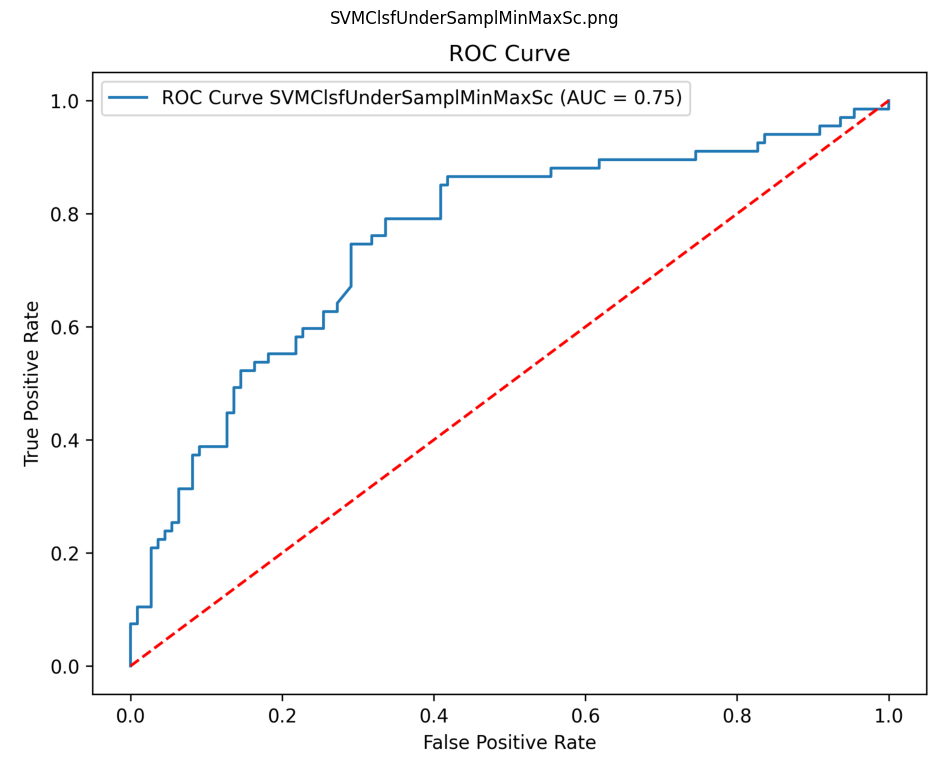

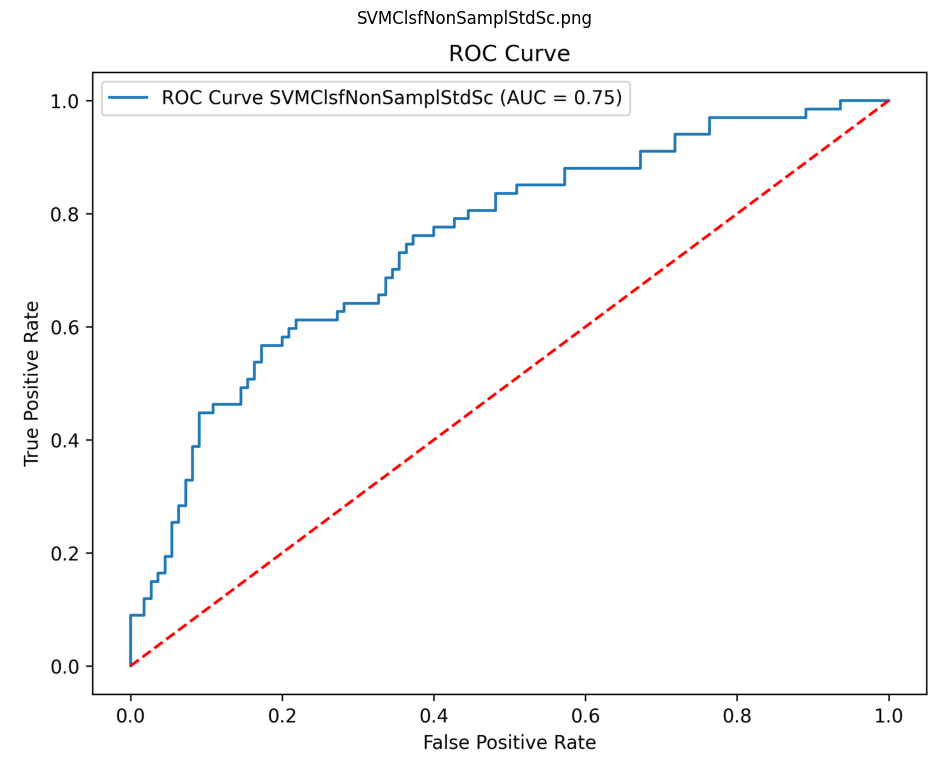

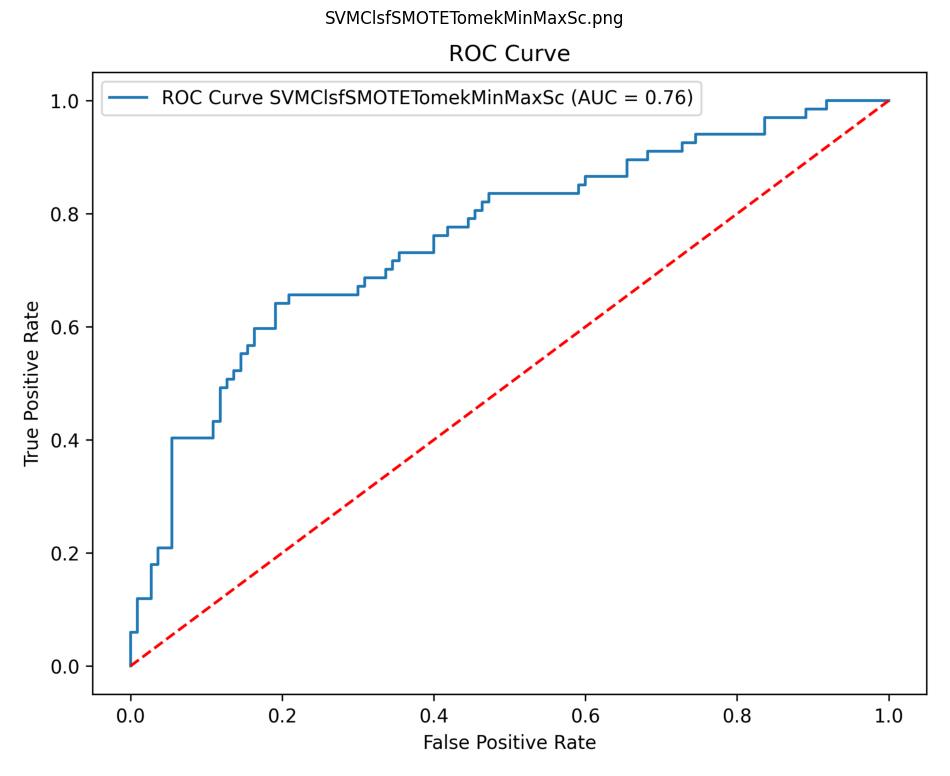

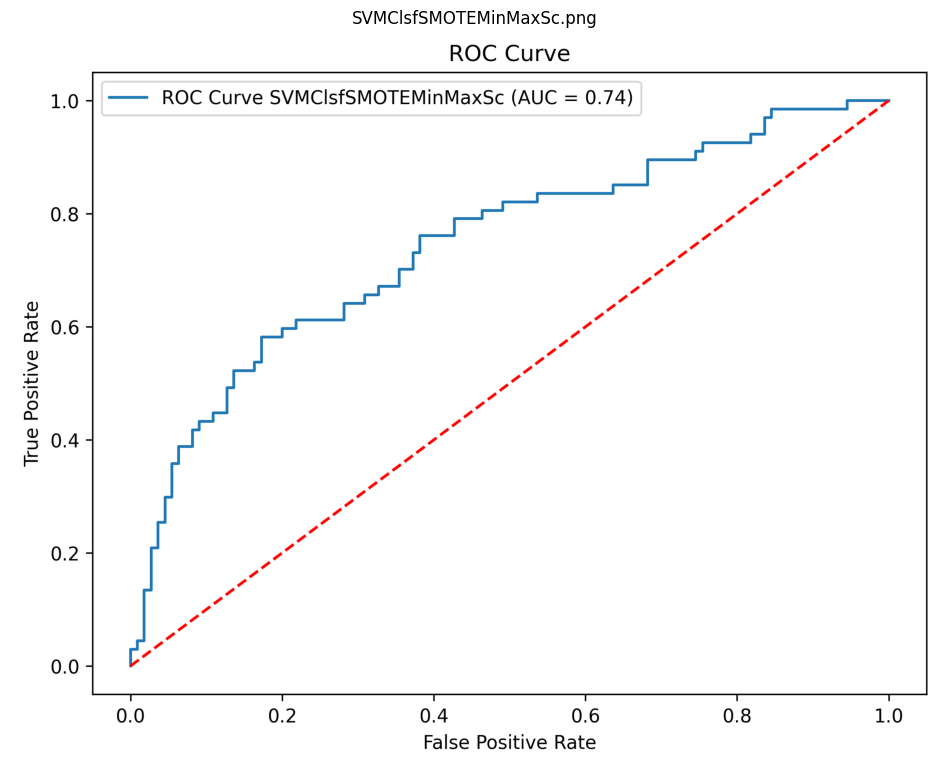

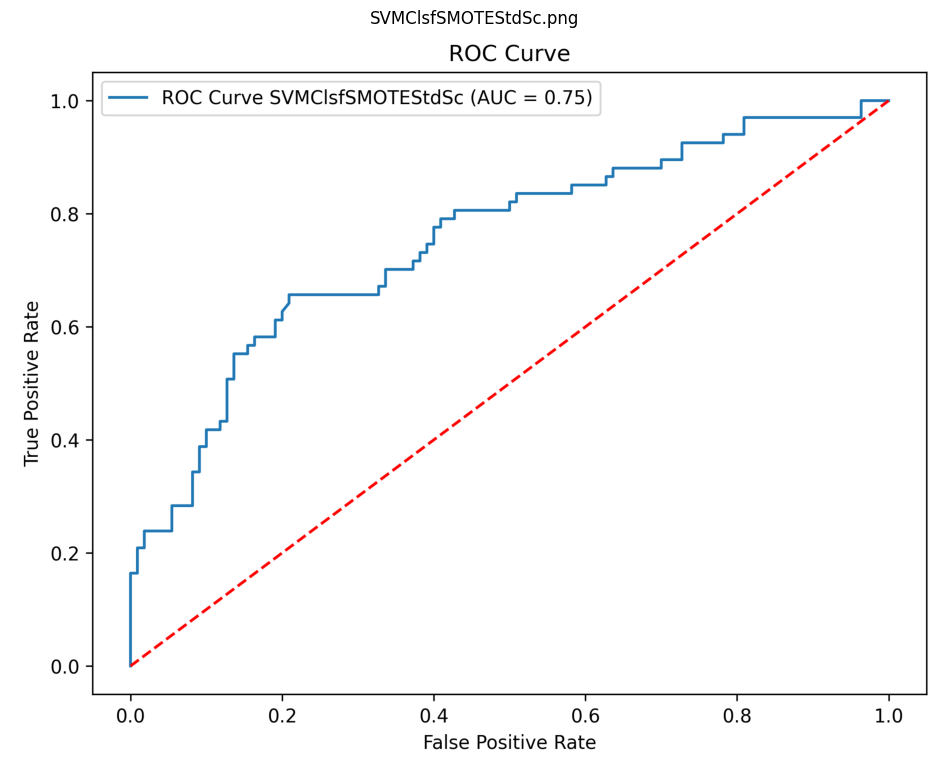

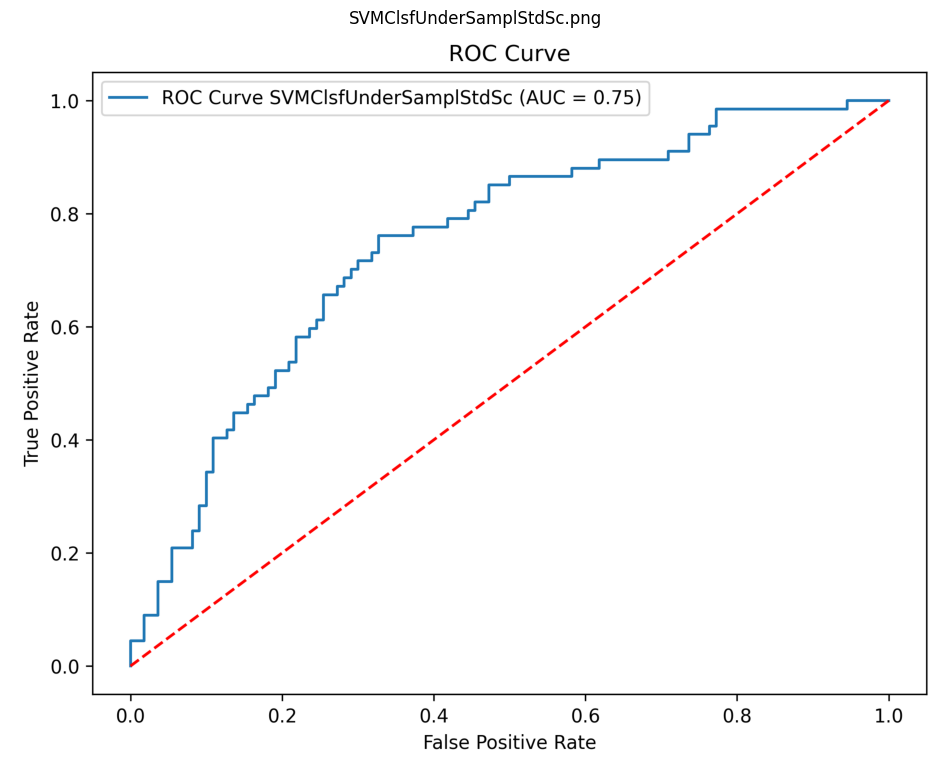

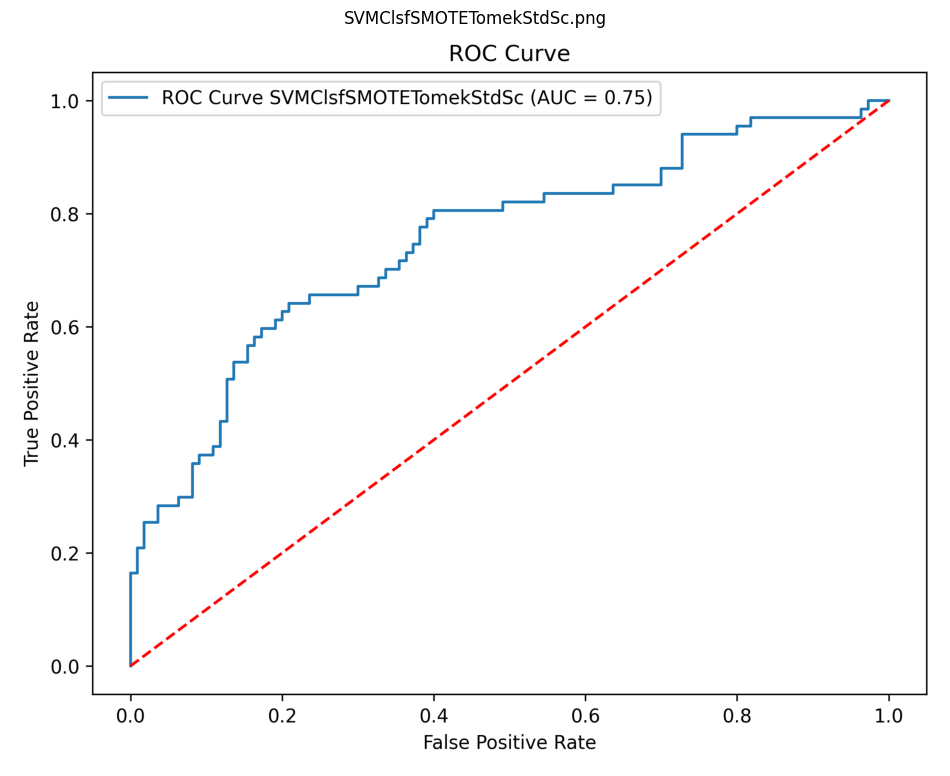

In [2]:
folder_path = "./roc"

image_files = [f for f in os.listdir(folder_path) if f.endswith(".png")]

for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    img = Image.open(image_path)
    
    plt.figure(figsize=(12, 10))
    plt.imshow(img)
    plt.axis("off")
    plt.title(image_file)
    plt.show()

----

## Выводы 

Метод опорных векторов хорошо подходит для задачи классификации активности, но для достижения высоких результатов необходимо учитывать дисбаланс классов и тщательно подбирать параметры модели. Наилучший результат достигнут при использовании SMOTE-Tomek и MinMaxScaler, что позволило увеличить сбалансированную точность и AUC.
